   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

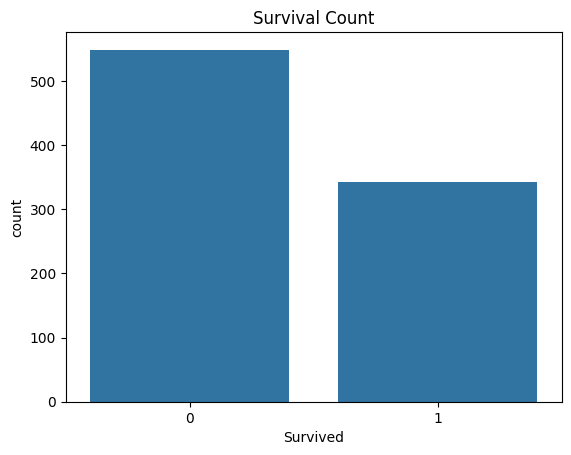

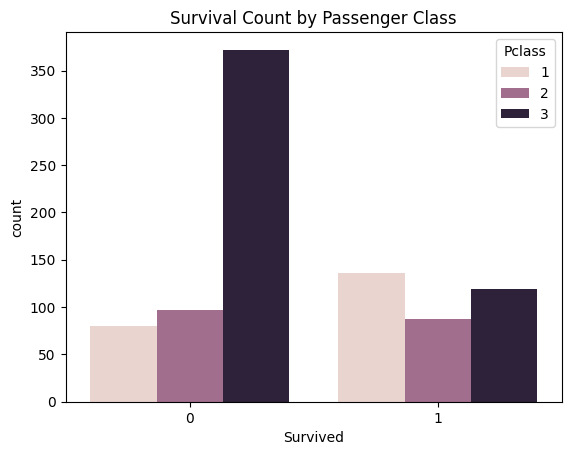

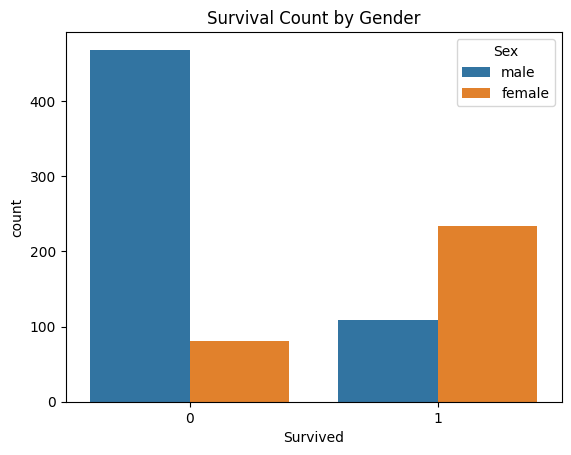

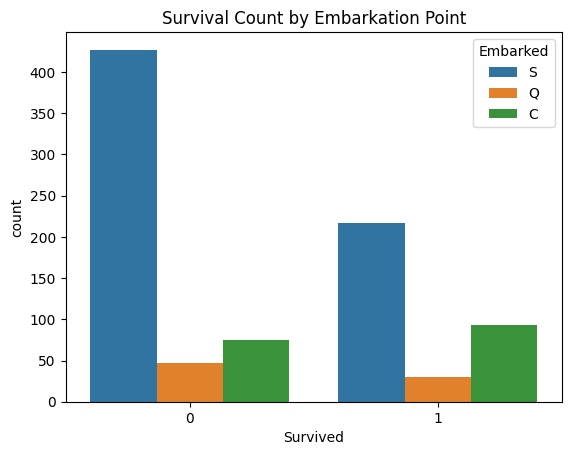

C:\Users\aditi\AppData\Local\Temp\ipykernel_42596\945515820.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\aditi\AppData\Local\Temp\ipykernel_42596\945515820.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Accuracy: 81.56%


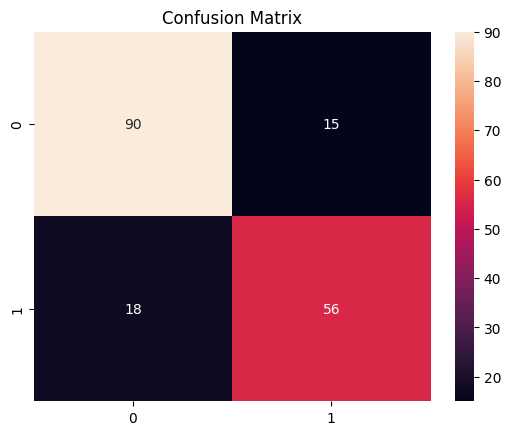

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

            Importance
Fare          0.274394
Sex_male      0.271343
Age           0.248763
Pclass_3      0.067036
SibSp         0.048284
Parch         0.038312
Embarked_S    0.023448
Pclass_2      0.017955
Embarked_Q    0.010465


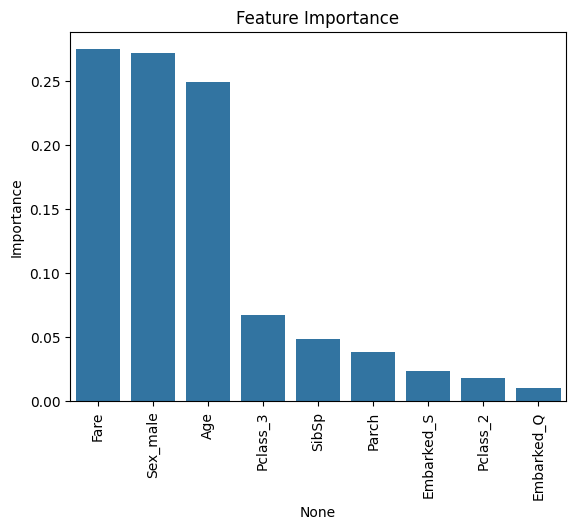

In [2]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
titanic_data = pd.read_csv('train.csv')

# Explore the data
print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())

# Visualize the data
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='Survived', hue='Embarked', data=titanic_data)
plt.title('Survival Count by Embarkation Point')
plt.show()

# Data Preprocessing
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
titanic_data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Convert categorical variables to numeric
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Split the data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

# Visualize Feature Importance
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()
